In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 150

In [3]:
graph = nx.complete_graph(100)

In [4]:
MC_STEPS = 1000
Q = 4
N = 100

In [5]:
def get_neighbors(graph):
    d = {}
    for node in list(graph.nodes()):
        d[node] = list(graph.neighbors(node))
    return d

In [6]:
def get_opinions(opinion1_prop, nodes_num):
    opinion1 = int(opinion1_prop*nodes_num)
    opinions = [-1]*(nodes_num - opinion1) + [1]*opinion1
    random.shuffle(opinions)
    opinions_dict = {i:opinions[i] for i in range(nodes_num)}
    return opinions_dict

In [7]:
def q_voter_model(graph, p, q, f, opinion1, MC_steps):
    opinions = get_opinions(opinion1, nx.number_of_nodes(graph))
    neighbors = get_neighbors(graph)
    nodes = list(neighbors.keys())
    n = len(nodes)
    concentration = np.zeros(MC_steps)
    for i in range(MC_steps):
        nodes = np.random.randint(0, n, size=n)
        ps = np.random.uniform(size=n) < p
        
        for j, node in enumerate(nodes):
            node_opinion = opinions[node]
            contrary = -1 if node_opinion == 1 else 1
            if ps[j]:
                opinions[node] = contrary if random.uniform(0, 1) < f else node_opinion
            else:
                curr_q = q
                if q > len(neighbors[node]):
                    curr_q = len(neighbors[node])
                neighbor_list = random.sample(neighbors[node], k=curr_q)
                neighbors_opinions = [opinions[i] for i in neighbor_list]
                if neighbors_opinions.count(node_opinion) == 0:
                    opinions[node] = contrary

    concentration = np.count_nonzero(np.array(list(opinions.values()))==opinion1)/n
    return concentration

In [8]:
ps = np.arange(0, 1, 0.01)

In [9]:
fs = [0.2, 0.3, 0.4, 0.5]

In [10]:
def simulate_q_voter_CG(p, q, epsilon, MC_steps=1000, steps=100, opinion1=1, N=100):
    graph = nx.complete_graph(N)
    results = np.zeros((steps, MC_steps))
    for i in range(steps):
        concentration = q_voter_model(graph, p, q, epsilon, opinion1, MC_steps)
        results[i] = concentration
    return np.mean(results, axis = 0)

## Concentration

In [11]:
def simulate_concentration(ps, f, Q, MC_steps=1000, steps=100, graph_size=100):
    final_concentration = np.zeros(len(ps))
    for i, p in enumerate(ps):
        final_concentration[i] = simulate_q_voter_CG(p, Q, f, MC_steps=MC_steps, steps=steps, opinion1=1, N=graph_size)[-1]
    return final_concentration

In [13]:
MC_STEPS = 1000
MC_STEPS2 = 2000
repetitions = 100
size=100

In [100]:
concentration = list(np.zeros(len(fs)))
for i, f in enumerate(fs):
    print(f)
    concentration[i] = simulate_concentration(ps, f, Q=4, MC_steps=MC_STEPS, steps=repetitions, graph_size=size)

0.2
0.3
0.4
0.5


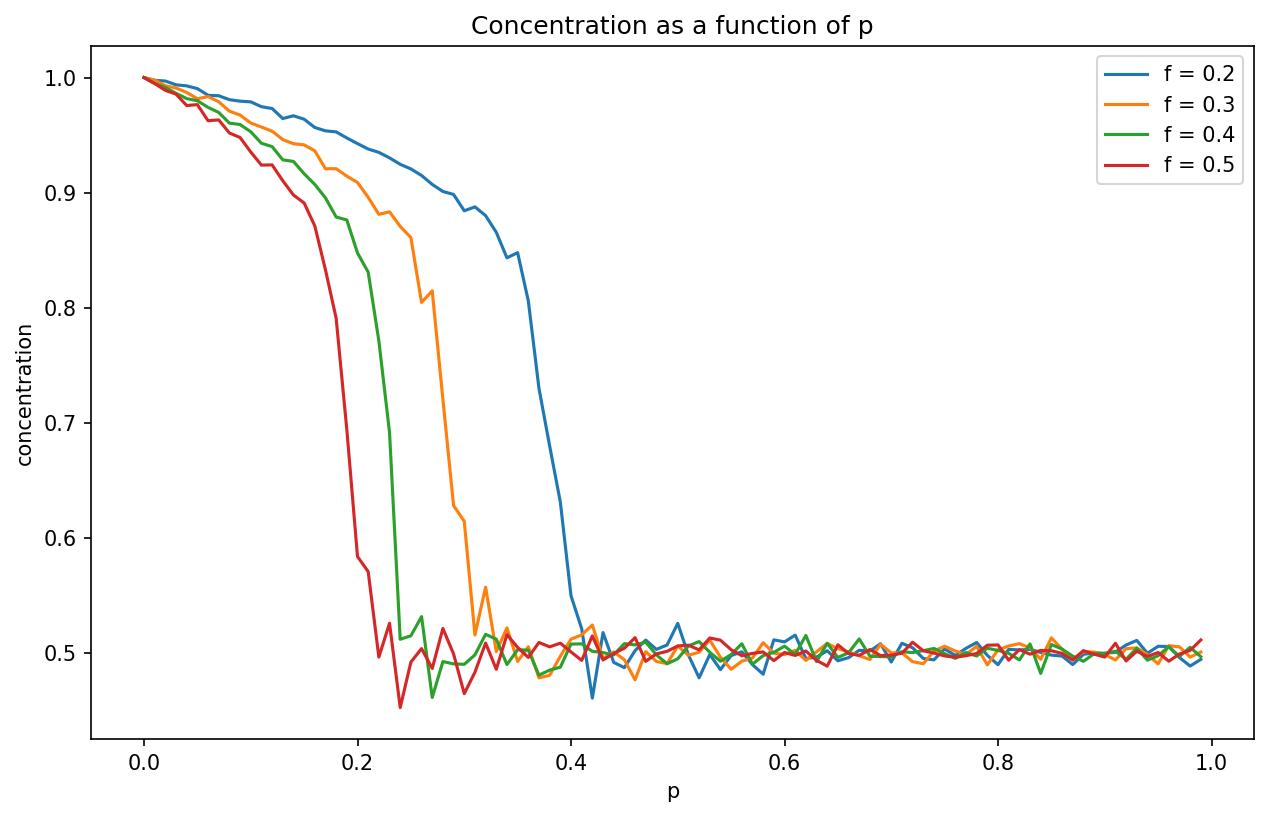

In [101]:
for i, f in enumerate(fs):
    plt.plot(ps, concentration[i], label=f'f = {f}')
plt.xlabel('p')
plt.ylabel('concentration')
plt.legend()
plt.title("Concentration as a function of p")
plt.savefig('concentration_200.png')

In [103]:
conc_arr = np.array(concentration) 

In [105]:
np.savetxt("concentration_200.txt", conc_arr)

In [14]:
concentration2 = list(np.zeros(len(fs)))
for i, f in enumerate(fs):
    print(f)
    concentration2[i] = simulate_concentration(ps, f, Q=4, MC_steps=MC_STEPS2, steps=repetitions, graph_size=size)

0.2
0.3
0.4
0.5


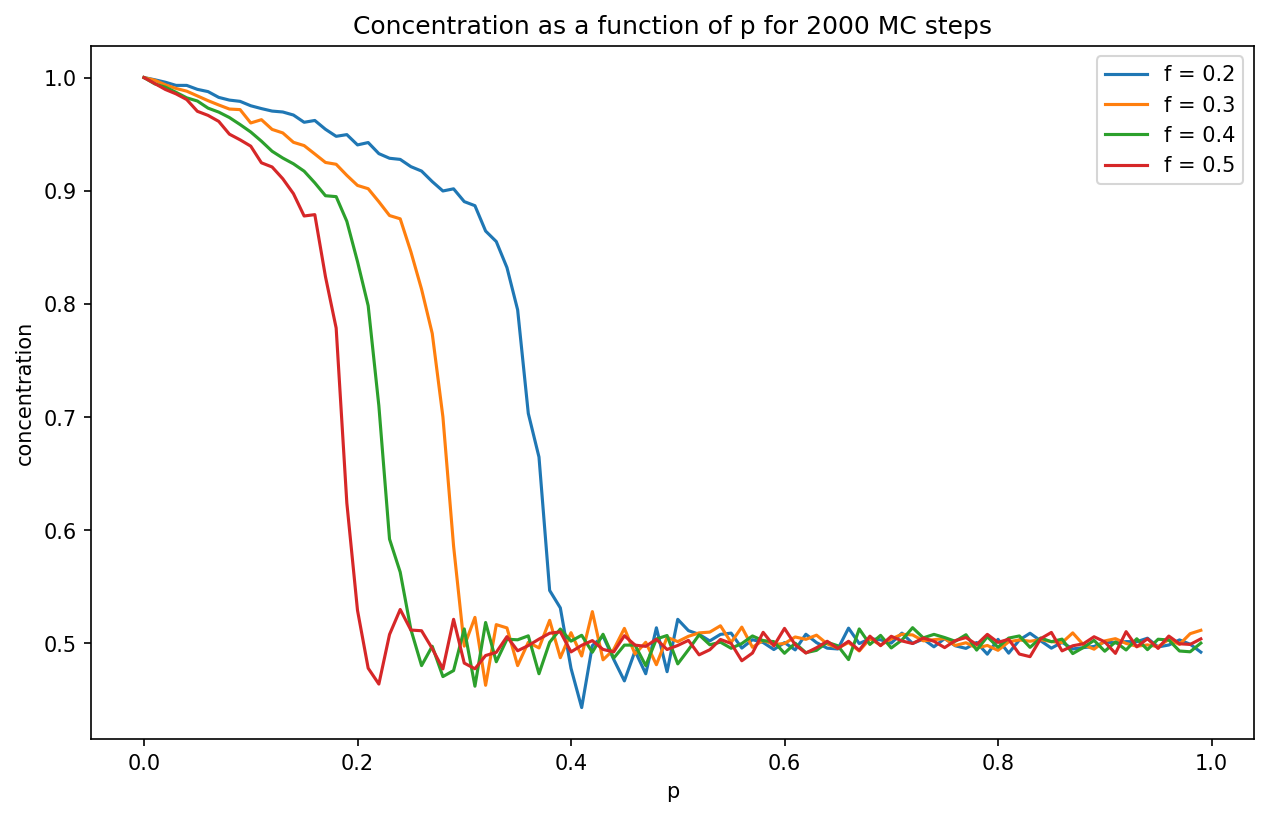

In [15]:
for i, f in enumerate(fs):
    plt.plot(ps, concentration2[i], label=f'f = {f}')
plt.xlabel('p')
plt.ylabel('concentration')
plt.legend()
plt.title("Concentration as a function of p for 2000 MC steps")
plt.savefig('concentration_2.png')

In [16]:
conc_arr = np.array(concentration2) 

In [17]:
np.savetxt("concentration_2.txt", conc_arr)